<a href="https://colab.research.google.com/github/susmita2022khatun/AI_hackathon/blob/main/assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from collections import deque
import pandas as pd

## problem simulation

In [4]:
# Simulated ask and bid sides (best price first)
ask_prices = deque([80.97, 80.98, 81.00, 81.01])
ask_sizes = deque([110, 140, 160, 190])

bid_prices = deque([80.93, 80.92, 80.91, 80.90])
bid_sizes = deque([112, 138, 200, 180])

In [5]:
# function for computing mid price
def compute_mid(asks, bids):
    if not asks or not bids:
        return None
    return (asks[0] + bids[0]) / 2

In [6]:
# computing temporary impact
def dynamic_temporary_impact(x, prices, sizes, opposing_prices, opposing_sizes, side="buy"):
    prices = deque(prices)
    sizes = deque(sizes)
    opposing_prices = deque(opposing_prices)
    opposing_sizes = deque(opposing_sizes)

    impact = 0
    shares_remaining = x
    while shares_remaining > 0 and prices:
        trade_size = min(sizes[0], shares_remaining)
        p_mid = compute_mid(prices if side == "sell" else opposing_prices,
                            opposing_prices if side == "sell" else prices)
        impact += trade_size * (prices[0] - p_mid)
        shares_remaining -= trade_size
        sizes[0] -= trade_size
        if sizes[0] == 0:
            prices.popleft()
            sizes.popleft()
    return impact / x if x > 0 else 0

In [8]:
# slippage
order_sizes = np.arange(1, 300, 1)
buy_impact_dynamic = [
    dynamic_temporary_impact(x, ask_prices, ask_sizes, bid_prices, bid_sizes, side="buy") for x in order_sizes
]
sell_impact_dynamic = [
    dynamic_temporary_impact(x, bid_prices, bid_sizes, ask_prices, ask_sizes, side="sell") for x in order_sizes
]

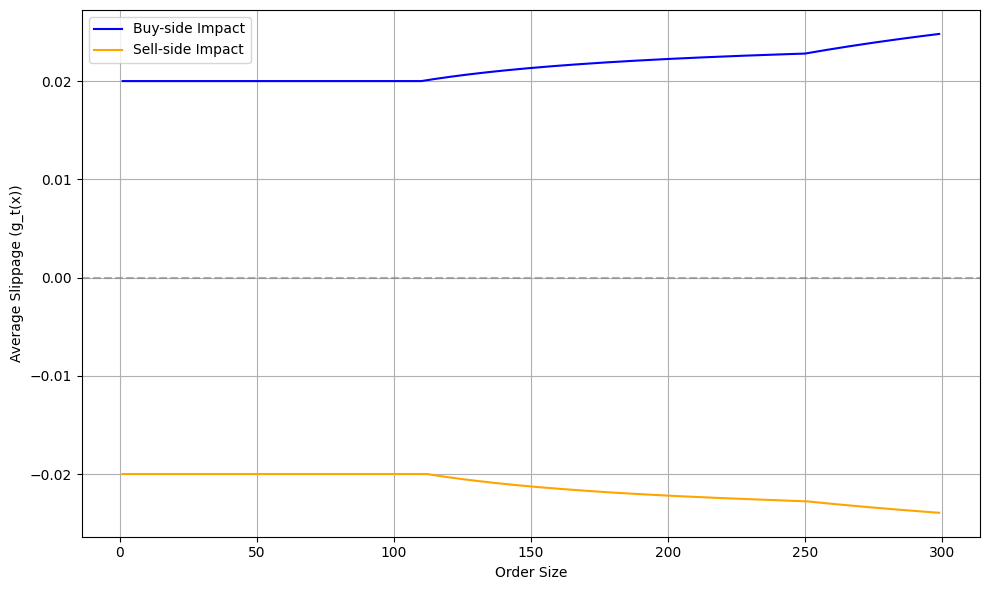

In [9]:
# plotting
plt.figure(figsize=(10, 6))
plt.plot(order_sizes, buy_impact_dynamic, label='Buy-side Impact', color='blue')
plt.plot(order_sizes, sell_impact_dynamic, label='Sell-side Impact', color='orange')
plt.axhline(0, color='gray', linestyle='--', alpha=0.6)
plt.xlabel("Order Size")
plt.ylabel("Average Slippage (g_t(x))")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
# Optimized Execution Strategy using Nonlinear Temporary Impact Model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

N = 390  # number of minutes in a trading day
S = 100000  # total shares to buy

In [12]:
# Simulate eta_t and alpha_t as varying over time for demonstration
np.random.seed(42)
eta_t = np.random.uniform(0.01, 0.05, N)
alpha_t = np.random.uniform(0.5, 1.5, N)

In [13]:
#Compute auxiliary variable a_t
with np.errstate(divide='ignore', invalid='ignore'):
    a_t = np.power(1 / ((1 + alpha_t) * eta_t), 1 / alpha_t)

#Normalize to satisfy sum x_t = S
Z = np.sum(a_t)
x_t = S * (a_t / Z)

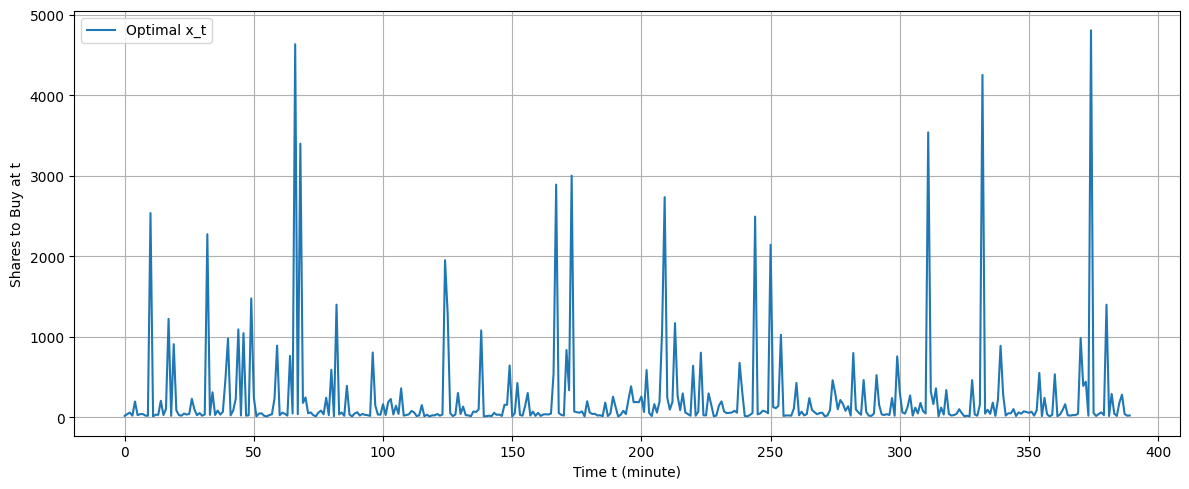

In [14]:
#Plot the resulting execution schedule
plt.figure(figsize=(12, 5))
plt.plot(x_t, label='Optimal x_t')
plt.xlabel('Time t (minute)')
plt.ylabel('Shares to Buy at t')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
# Optionally export to CSV
optimized_df = pd.DataFrame({
    'time': np.arange(1, N + 1),
    'eta_t': eta_t,
    'alpha_t': alpha_t,
    'x_t': x_t
})

optimized_df.to_csv('optimized_execution_schedule.csv', index=False)